In [158]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn import linear_model
from sklearn.linear_model import BayesianRidge
from sklearn import tree
from sklearn.linear_model import QuantileRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_score
from scipy.stats import randint

In [159]:
data = pd.read_csv("D:\Krishna\Choder\Data Analysis\House prices\housing.csv")

In [160]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


'total_bedrooms' has some null entries which we have to manage

We have to manage 'ocean_proximity' too as we can't have objects.

In [162]:
data.dropna(inplace=True)

In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [164]:
X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

In [166]:
train_data = X_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
3522,-118.50,34.27,35.0,2235.0,390.0,1148.0,416.0,4.8690,<1H OCEAN,221600.0
12791,-121.46,38.65,8.0,3746.0,767.0,2161.0,744.0,3.2039,INLAND,103400.0
9511,-123.22,39.15,36.0,1166.0,216.0,504.0,203.0,3.5938,<1H OCEAN,122100.0
14282,-117.13,32.72,32.0,2197.0,623.0,1784.0,599.0,1.9010,NEAR OCEAN,120300.0
19587,-120.80,37.61,30.0,918.0,154.0,469.0,139.0,3.9688,INLAND,175000.0
...,...,...,...,...,...,...,...,...,...,...
2457,-119.65,36.51,30.0,1671.0,319.0,966.0,282.0,3.1333,INLAND,100000.0
16725,-120.66,35.46,17.0,3748.0,609.0,1860.0,612.0,4.5179,<1H OCEAN,225600.0
11801,-121.28,38.90,31.0,1297.0,259.0,765.0,240.0,2.7656,INLAND,93600.0
16891,-122.37,37.59,52.0,2272.0,403.0,963.0,376.0,5.7245,NEAR OCEAN,500000.0


### Visulaising the data

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

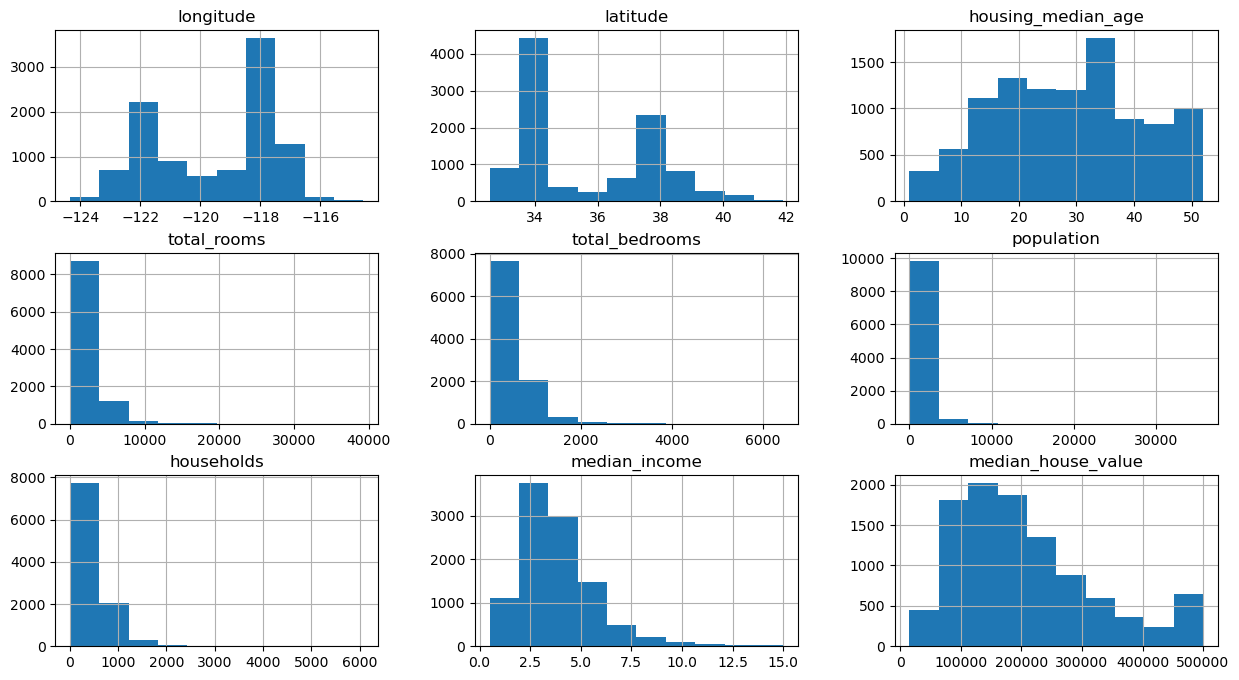

In [167]:
train_data.hist(figsize=(15,8))

Here we can see that the data given is a bit skewed so we will have to check them and make them better

C:\Users\kd721\AppData\Local\Temp\ipykernel_24900\4030865306.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')


<Axes: >

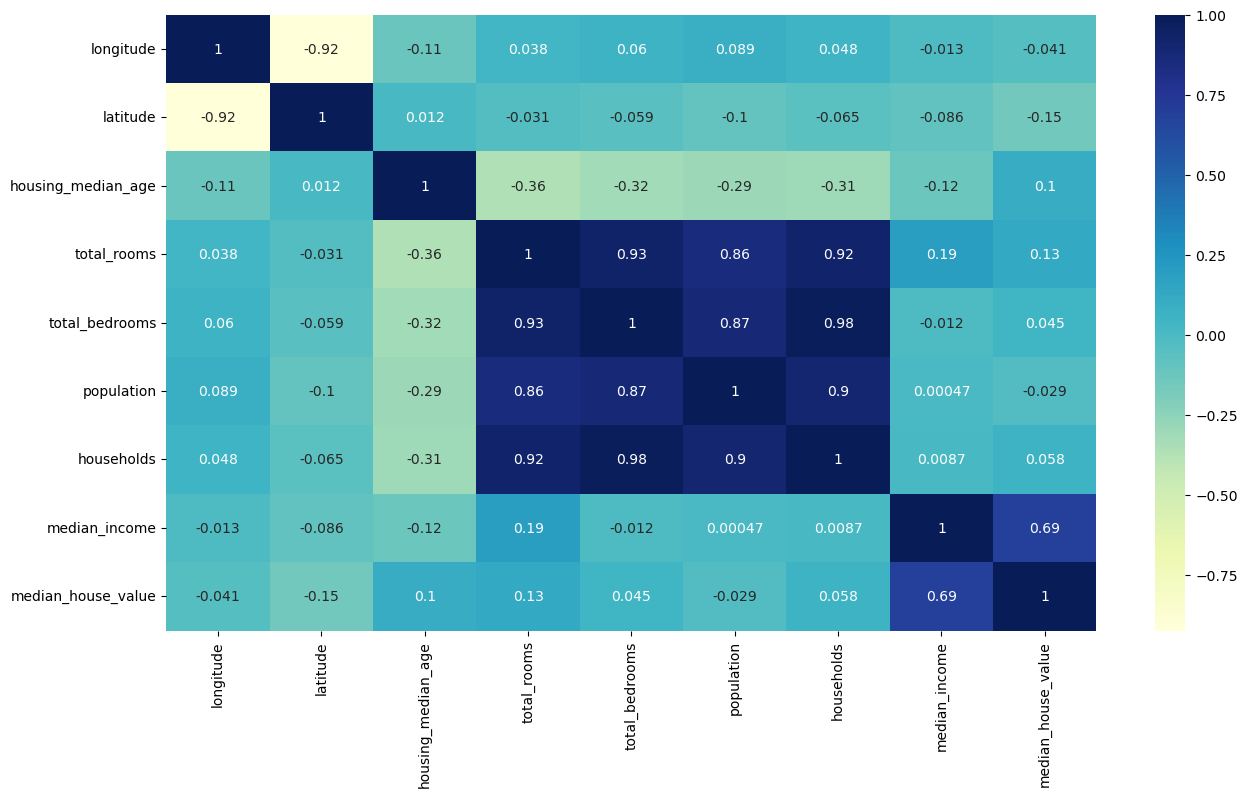

In [168]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

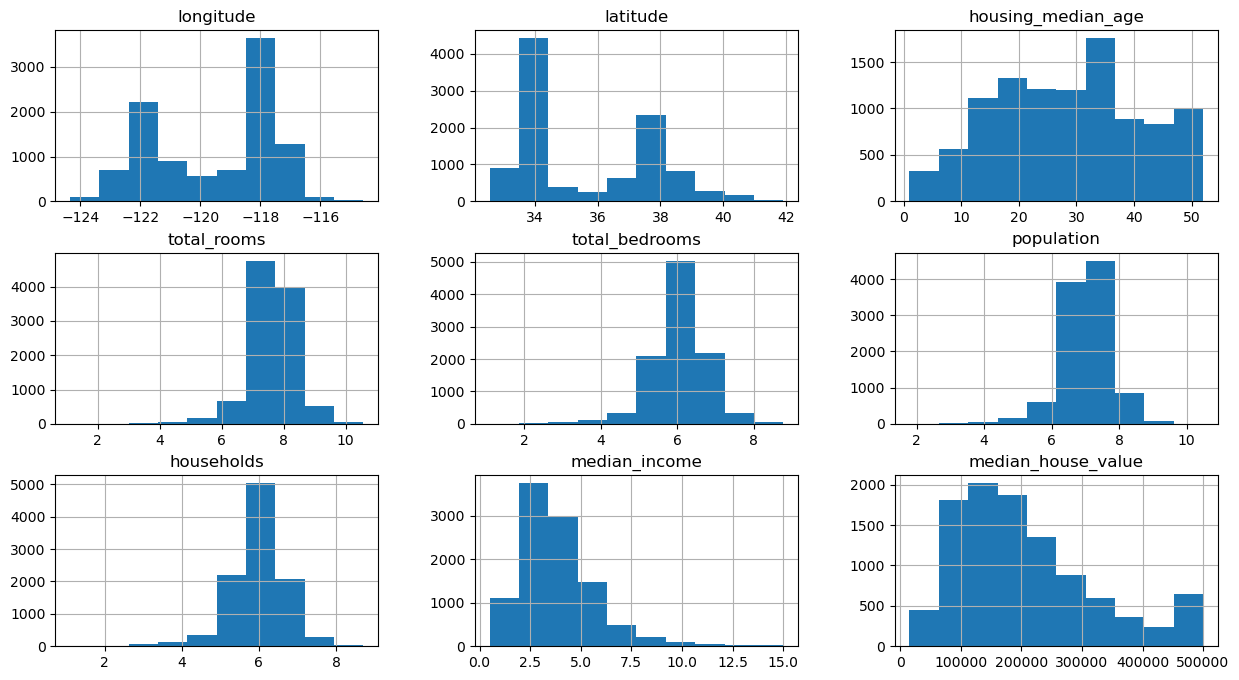

In [169]:
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)

train_data.hist(figsize=(15,8))

## Preprocessing

In [170]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     4447
INLAND        3295
NEAR OCEAN    1366
NEAR BAY      1106
ISLAND           2
Name: ocean_proximity, dtype: int64

In [171]:
pd.get_dummies(train_data.ocean_proximity)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
3522,1,0,0,0,0
12791,0,1,0,0,0
9511,1,0,0,0,0
14282,0,0,0,0,1
19587,0,1,0,0,0
...,...,...,...,...,...
2457,0,1,0,0,0
16725,1,0,0,0,0
11801,0,1,0,0,0
16891,0,0,0,0,1


In [172]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

<Axes: >

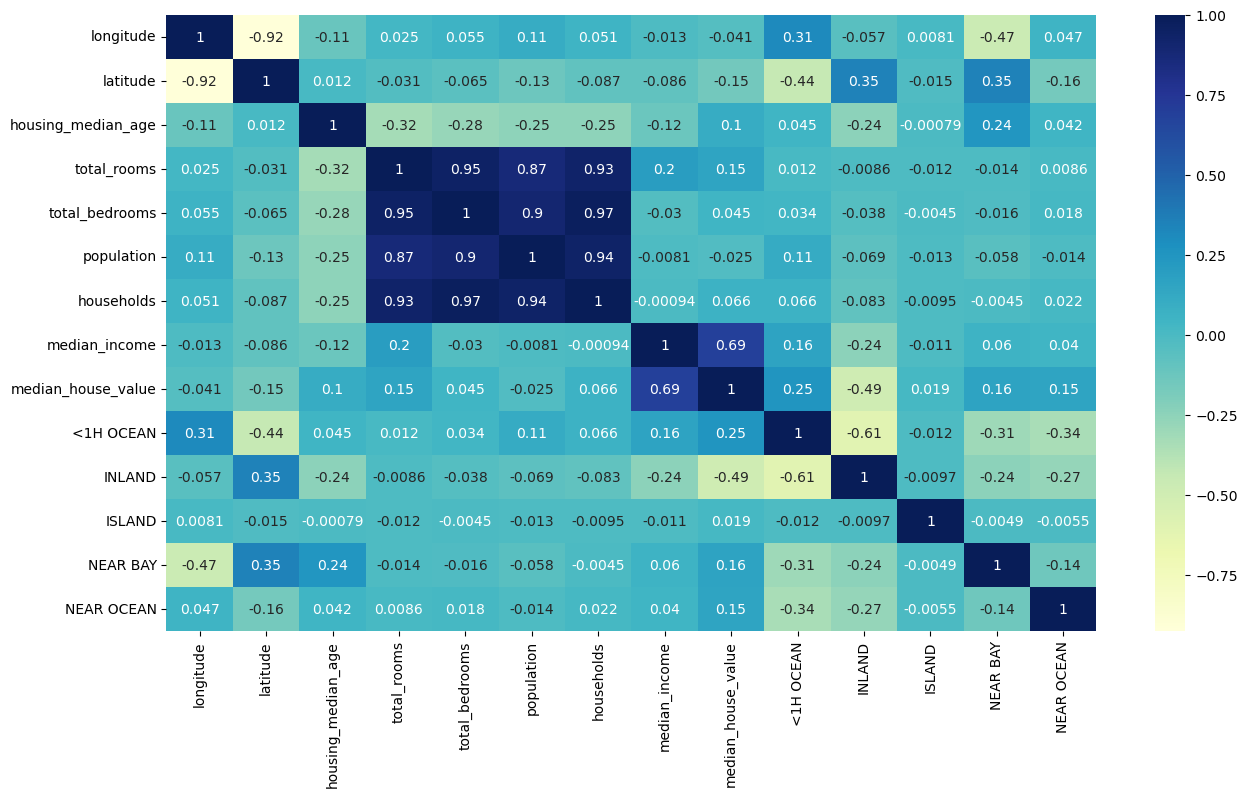

In [173]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

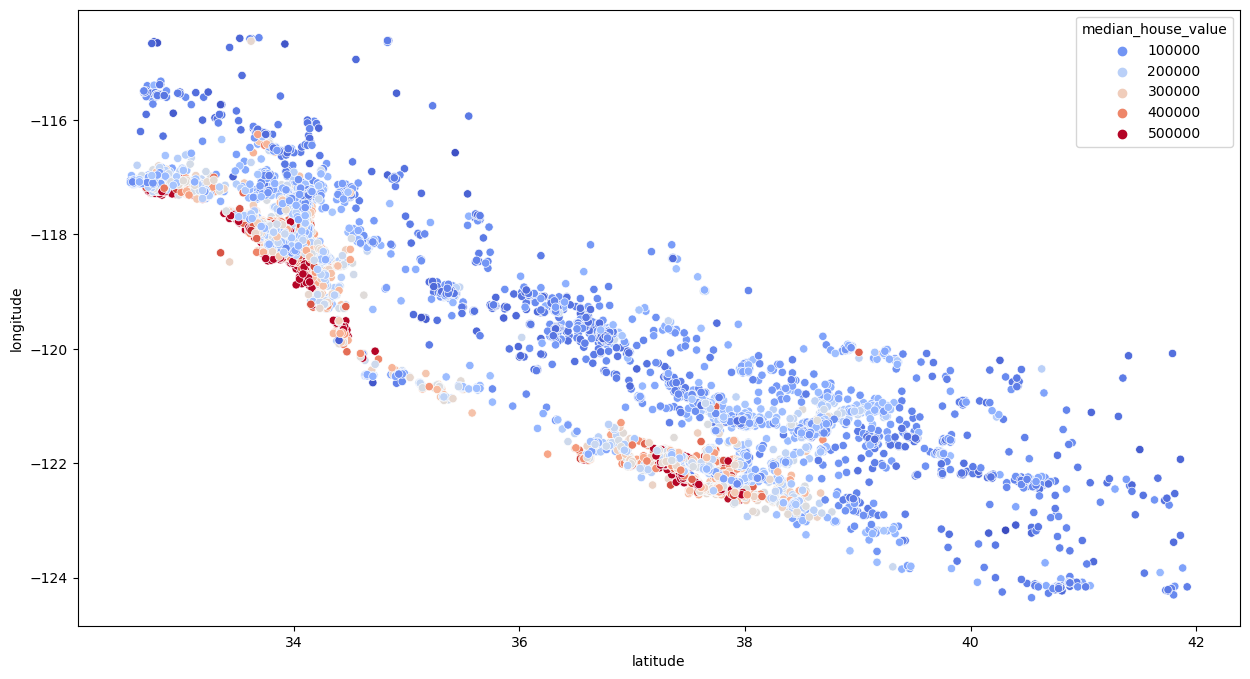

In [174]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y = 'longitude', data=train_data, hue = 'median_house_value', palette = 'coolwarm')

<Axes: >

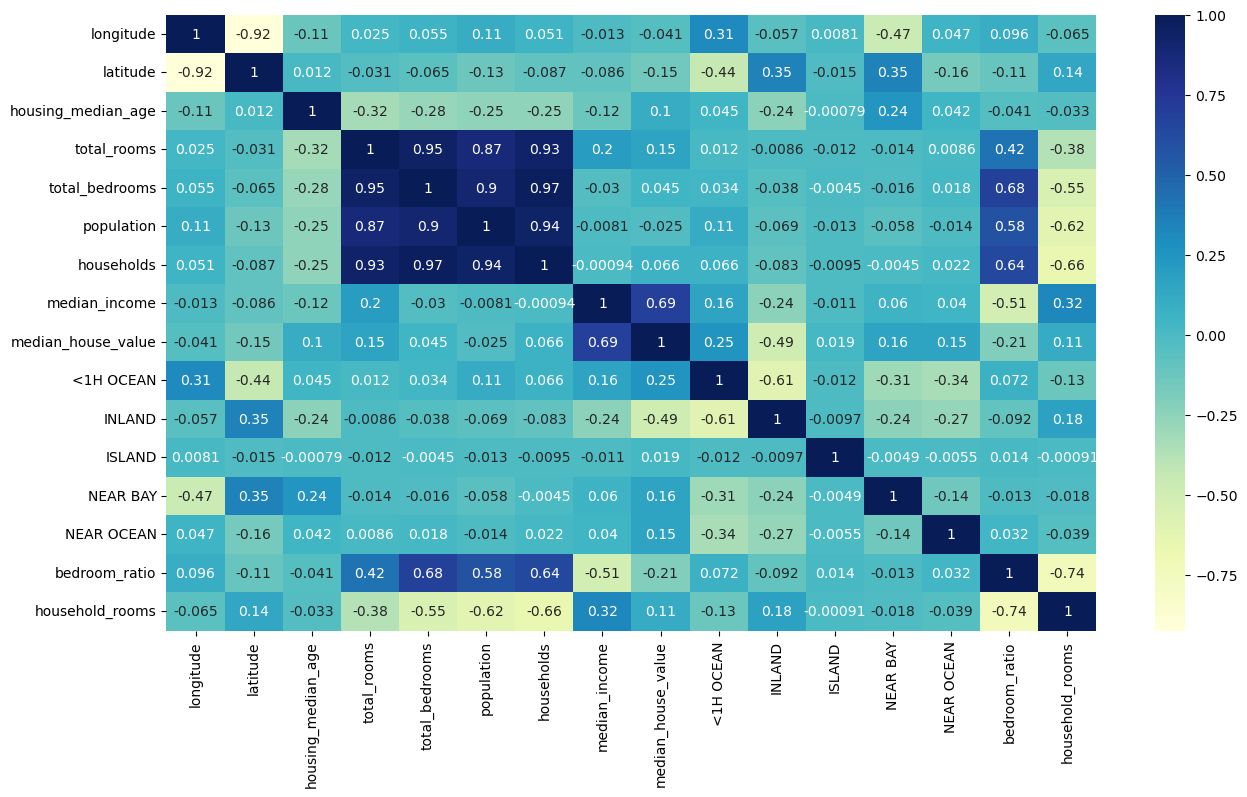

In [175]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms']/train_data['households']

plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

## Training Data and using Linear Regression

In [272]:
X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [273]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
3522,-118.50,34.27,35.0,7.712444,5.968708,7.046647,6.033086,4.8690,1,0,0,0,0,0.773906,1.278358
12791,-121.46,38.65,8.0,8.228711,6.643790,7.678789,6.613384,3.2039,0,1,0,0,0,0.807391,1.244251
9511,-123.22,39.15,36.0,7.062192,5.379897,6.224558,5.318120,3.5938,1,0,0,0,0,0.761789,1.327949
14282,-117.13,32.72,32.0,7.695303,6.436150,7.487174,6.396930,1.9010,0,0,0,0,1,0.836374,1.202968
19587,-120.80,37.61,30.0,6.823286,5.043425,6.152733,4.941642,3.9688,0,1,0,0,0,0.739149,1.380773


## Test Data

In [274]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms']+1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1)
test_data['population'] = np.log(test_data['population']+1)
test_data['households'] = np.log(test_data['households']+1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms']/test_data['households']

X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

AttributeError: 'DataFrame' object has no attribute 'ocean_proximity'

### Score

In [275]:
reg.score(X_train, y_train)

0.6725205876399034

In [276]:
X_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
10238,-117.88,33.90,21.0,8.064951,6.075346,7.254178,5.971262,6.5945,1,0,0,0,0,0.753302,1.350628
9995,-121.03,39.14,10.0,8.051660,6.263398,7.151485,6.238325,4.0775,0,1,0,0,0,0.777902,1.290677
12819,-121.48,38.62,23.0,8.950273,7.154615,8.330382,7.141245,3.8272,0,1,0,0,0,0.799374,1.253321
8265,-118.18,33.77,41.0,7.625107,6.400257,6.748760,6.280396,2.5726,0,0,0,0,1,0.839366,1.214113
10430,-117.64,33.45,27.0,5.814131,4.043051,4.875197,3.850148,4.8750,0,0,0,0,1,0.695384,1.510106


In [277]:
reg.score(X_test, y_test)

0.6693211571524247

### Using Standard Scaler

In [278]:
scaler = StandardScaler()

X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [279]:
reg.fit(X_train_s, y_train)

LinearRegression()

In [280]:
reg.score(X_test_s, y_test)

0.6693211571524248

### Parameters

In [281]:
param_grid = {
    "fit_intercept": [True, False],
    "copy_X": [True, False],
    "n_jobs": [-1]
}

grid_search = GridSearchCV(reg, param_grid, cv=5, scoring = "neg_mean_squared_error", return_train_score = True)

grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [-1]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [282]:
best_linear = grid_search.best_estimator_

In [283]:
best_linear.score(X_test_s, y_test)

-2.599042972421604

In [284]:
cv_score = cross_val_score(best_linear, X_train_s, y_train, cv = 5, scoring = 'r2')
np.mean(cv_score)

-15947.949059678896

In [285]:
cv_score_test = cross_val_score(best_linear, X_test_s, y_test, cv = 5, scoring = 'r2')
np.mean(cv_score_test)

-2.6080505976813684

## Using Random Forest Regressor

In [250]:
forest = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

### scores

In [186]:
forest.score(X_train, y_train)

0.9729675714805992

In [187]:
forest.score(X_test, y_test)

0.7977323483896165

In [251]:
forest.fit(X_train_s, y_train)

RandomForestRegressor()

In [189]:
forest.score(X_train_s, y_train)

0.9732438798831876

In [190]:
forest.score(X_test_s, y_test)

0.7977802687724701

### Giving parameters

In [191]:
param_grid = {"n_estimators": [100, 200, 300], "min_samples_split": [2, 4], "max_depth": [None, 4, 8]}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring = "neg_mean_squared_error", return_train_score = True)

grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [192]:
best_forest = grid_search.best_estimator_

### Score

In [193]:
best_forest.score(X_train_s, y_train)

0.9737264090130154

In [194]:
best_forest.score(X_test_s, y_test)

0.7997126821954156

### K - Fold Validation

In [195]:
cv_score = cross_val_score(best_forest, X_train_s, y_train, cv = 5, scoring = 'r2')

In [196]:
cv_score_test = cross_val_score(best_forest, X_test_s, y_test, cv = 5, scoring = 'r2')

In [197]:
np.mean(cv_score_test)

0.7843897759971274

In [198]:
np.mean(cv_score)

0.8019265085868289

### Using Randomized Seach CV

In [252]:
param_dist = {
    "n_estimators": randint(100, 1000),
    "max_features": ['auto', 'sqrt', 'log2'],
    "max_depth": [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],  # List of options for max_depth
    "min_samples_split": randint(2, 11),
    "min_samples_leaf": randint(1, 11),
    "bootstrap": [True, False]
}

random_search = RandomizedSearchCV(forest, param_distributions=param_dist, n_iter=100, cv=5, scoring="r2", return_train_score=True)
random_search.fit(X_train_s, y_train)

C:\Users\kd721\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
130 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
130 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\kd721\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kd721\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\kd721\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\kd721\anaconda3\Lib\site-packag

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 1, 2, 3, 4, 5, 6, 7,
                                                      8, 9, 10],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000028E1E4F9F10>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000028E18DF9B10>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000028E1E4E9CD0>},
                   return_train_score=True, scoring='r2')

In [253]:
best_random_forest = random_search.best_estimator_
best_random_forest.score(X_test_s, y_test)

0.7957539741833612

In [254]:
best_random_forest.score(X_train_s, y_train)

0.9646951847948522

### K - fold Validation

In [255]:
cv_score = cross_val_score(best_random_forest, X_train_s, y_train, cv = 5, scoring = 'r2')
np.mean(cv_score)

0.7939610172467081

In [256]:
cv_score_test = cross_val_score(best_random_forest, X_test_s, y_test, cv = 5, scoring = 'r2')
np.mean(cv_score_test)

0.7837209310701223

## Trying Ridge Model

In [199]:
reg = linear_model.Ridge(alpha=.5)

In [200]:
reg.fit(X_train_s, y_train)

Ridge(alpha=0.5)

### Score

In [201]:
reg.score(X_test_s, y_test)

0.6693642060864666

### Giving Parameters

In [202]:
param_grid = {
    "alpha": [0.001, 0.01, 0.1, 1.0, 10.0],
    "fit_intercept": [True, False]
}

grid_search = GridSearchCV(reg, param_grid, cv=5, scoring = "neg_mean_squared_error", return_train_score = True)

grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=Ridge(alpha=0.5),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
                         'fit_intercept': [True, False]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [203]:
best_ridge = grid_search.best_estimator_

In [204]:
best_ridge.score(X_test_s, y_test)

0.6694002769652309

Applying K - fold Validation on Ridge

In [205]:
cv_score = cross_val_score(best_ridge, X_train_s, y_train, cv = 5, scoring = 'r2')
np.mean(cv_score)

0.6688959365469573

In [206]:
cv_score_test = cross_val_score(best_ridge, X_test_s, y_test, cv = 5, scoring = 'r2')
np.mean(cv_score_test)

0.6674200238179211

## Trying Bayesian Ridge Regression

In [215]:
reg = BayesianRidge()
reg.fit(X_train_s, y_train)

BayesianRidge()

In [216]:
reg.score(X_test_s, y_test)

0.6694369640459206

In [217]:
param_grid = {
    "alpha_init": [0.001, 0.01, 0.1, 1.0, 10.0],
    "lambda_init": [0.001, 0.01, 0.1, 1.0, 10.0],
    "max_iter": [100, 200, 500, 1000]
}

grid_search = GridSearchCV(reg, param_grid, cv=5, scoring = "neg_mean_squared_error", return_train_score = True)

grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=BayesianRidge(),
             param_grid={'alpha_init': [0.001, 0.01, 0.1, 1.0, 10.0],
                         'lambda_init': [0.001, 0.01, 0.1, 1.0, 10.0],
                         'max_iter': [100, 200, 500, 1000]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [218]:
best_Bayesian = grid_search.best_estimator_

In [219]:
best_Bayesian.score(X_test_s, y_test)

0.6694369640459047

K - Fold Validation on Bayesian

In [220]:
cv_score = cross_val_score(best_Bayesian, X_train_s, y_train, cv = 5, scoring = 'r2')
np.mean(cv_score)

0.6688445871858264

In [221]:
cv_score_test = cross_val_score(best_Bayesian, X_test_s, y_test, cv = 5, scoring = 'r2')
np.mean(cv_score_test)

0.6674320479813023

## Trying Lasso Model

In [222]:
reg = linear_model.Lasso(alpha=0.5)

reg.fit(X_train_s, y_train)

C:\Users\kd721\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.028e+13, tolerance: 1.388e+10
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.5)

In [223]:
reg.score(X_test_s, y_test)

0.6693843239692223

### Parameters

In [224]:
param_grid = {
    "alpha": [0.001, 0.01, 0.1, 1.0, 10.0],
    "fit_intercept": [True, False],
    "max_iter": [10000, 20000],
    "tol": [1e-4, 1e-6]
}

grid_search = GridSearchCV(reg, param_grid, cv=5, scoring = "neg_mean_squared_error", return_train_score = True)

grid_search.fit(X_train_s, y_train)

C:\Users\kd721\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.189e+12, tolerance: 1.106e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\kd721\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.161e+12, tolerance: 1.129e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\kd721\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.146e+12, toleranc

C:\Users\kd721\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.257e+13, tolerance: 4.584e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\kd721\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.259e+13, tolerance: 4.596e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\kd721\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.241e+13, toleranc

C:\Users\kd721\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.203e+12, tolerance: 1.109e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\kd721\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.175e+12, tolerance: 1.102e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\kd721\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.189e+12, toleranc

C:\Users\kd721\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.111e+12, tolerance: 4.617e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\kd721\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.259e+13, tolerance: 4.595e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\kd721\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.257e+13, toleranc

C:\Users\kd721\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.161e+12, tolerance: 1.129e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\kd721\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.146e+12, tolerance: 1.109e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\kd721\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.203e+12, toleranc

C:\Users\kd721\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.110e+10, tolerance: 1.129e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\kd721\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.146e+10, tolerance: 1.102e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\kd721\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.171e+10, toleranc

C:\Users\kd721\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.243e+11, tolerance: 4.639e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\kd721\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.550e+09, tolerance: 4.595e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\kd721\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.282e+11, toleranc

GridSearchCV(cv=5, estimator=Lasso(alpha=0.5),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
                         'fit_intercept': [True, False],
                         'max_iter': [10000, 20000], 'tol': [0.0001, 1e-06]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [225]:
best_Lasso = grid_search.best_estimator_

In [226]:
best_Lasso.score(X_test_s, y_test)

0.669330621387215

K - Fold Validation on Lasso

In [227]:
cv_score = cross_val_score(best_Lasso, X_train_s, y_train, cv = 5, scoring = 'r2')
np.mean(cv_score)

C:\Users\kd721\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.171e+10, tolerance: 1.106e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\kd721\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.110e+10, tolerance: 1.129e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\kd721\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.191e+10, toleranc

0.6689088132192094

In [228]:
cv_score_test = cross_val_score(best_Lasso, X_test_s, y_test, cv = 5, scoring = 'r2')
np.mean(cv_score_test)

C:\Users\kd721\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.993e+10, tolerance: 1.075e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\kd721\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.942e+10, tolerance: 1.072e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\kd721\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.911e+10, toleranc

0.6673850329705481

## Trying Decision Tree Regression Model

In [229]:
reg = tree.DecisionTreeRegressor()
reg.fit(X_train_s, y_train)

DecisionTreeRegressor()

In [230]:
reg.score(X_test_s, y_test)

0.5982551005586054

### Parameters

In [231]:
param_grid = {
    'criterion': ['mse', 'friedman_mse', 'mae'], # The function to measure the quality of a split
    'splitter': ['best', 'random'], # The strategy used to choose the split at each node
    'max_depth': [None, 5, 10, 15, 20], # The maximum depth of the tree
    'min_samples_split': [2, 5, 10], # The minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4], # The minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2', None] # The number of features to consider for the best split
}

grid_search = GridSearchCV(reg, param_grid, cv=5, scoring = "neg_mean_squared_error", return_train_score = True)

grid_search.fit(X_train_s, y_train)

C:\Users\kd721\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
4050 fits failed out of a total of 5400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1800 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\kd721\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kd721\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\kd721\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\kd721\anaconda3\Lib\site-pac

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             return_train_score=True, scoring='neg_mean_squared_error')

In [232]:
best_Tree = grid_search.best_estimator_

In [233]:
best_Tree.score(X_test_s, y_test)

0.696932205784131

K - Fold Validation on Decision Tree

In [234]:
cv_score = cross_val_score(best_Tree, X_train_s, y_train, cv = 5, scoring = 'r2')
np.mean(cv_score)

0.7011122672299686

In [235]:
cv_score_test = cross_val_score(best_Tree, X_test_s, y_test, cv = 5, scoring = 'r2')
np.mean(cv_score_test)

0.6770904079532085

## Trying Quantile Regression Model

In [50]:
reg = QuantileRegressor(quantile=0.5, solver="highs").fit(X_train_s, y_train)

In [51]:
reg.score(X_test_s, y_test)

-0.05654943848635785

## Trying LARS Lasso (Least Angle Regression)

In [236]:
reg = linear_model.LassoLars(alpha=0.5)
reg.fit(X_train_s, y_train)

LassoLars(alpha=0.5)

In [237]:
reg.score(X_test_s, y_test)

0.6693259169486057

### Parameters

In [238]:
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0],
    'max_iter': [1000, 2000, 5000]
}

grid_search = GridSearchCV(reg, param_grid, cv=5, scoring = "neg_mean_squared_error", return_train_score = True)

grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=LassoLars(alpha=0.5),
             param_grid={'alpha': [0.1, 0.5, 1.0, 1.5, 2.0],
                         'max_iter': [1000, 2000, 5000]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [239]:
best_Lars = grid_search.best_estimator_

In [240]:
best_Lars.score(X_test_s, y_test)

0.6693221137744817

K - Fold Validation on LARS Lasso

In [241]:
cv_score = cross_val_score(best_Lars, X_train_s, y_train, cv = 5, scoring = 'r2')
np.mean(cv_score)

0.6689098869489712

In [242]:
cv_score_test = cross_val_score(best_Lars, X_test_s, y_test, cv = 5, scoring = 'r2')
np.mean(cv_score_test)

0.6673803396473966

## Trying Support Vector Machines Regression model

In [263]:
svr = SVR(kernel='linear', C = 1000)

In [264]:
param_grid = {
    "kernel": ["linear", "rbf", "poly"],
    "C": [1, 10, 100],
    "gamma": ["scale", "auto"],
}

In [265]:
rs_model = RandomizedSearchCV(svr, param_distributions = param_grid, cv=10, verbose=2, n_iter=10)
rs_model.fit(X_train_s, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END ......................C=10, gamma=auto, kernel=poly; total time=   5.6s
[CV] END ......................C=10, gamma=auto, kernel=poly; total time=   3.1s
[CV] END ......................C=10, gamma=auto, kernel=poly; total time=   3.1s
[CV] END ......................C=10, gamma=auto, kernel=poly; total time=   3.0s
[CV] END ......................C=10, gamma=auto, kernel=poly; total time=   3.0s
[CV] END ......................C=10, gamma=auto, kernel=poly; total time=   3.1s
[CV] END ......................C=10, gamma=auto, kernel=poly; total time=   3.0s
[CV] END ......................C=10, gamma=auto, kernel=poly; total time=   3.3s
[CV] END ......................C=10, gamma=auto, kernel=poly; total time=   3.1s
[CV] END ......................C=10, gamma=auto, kernel=poly; total time=   3.1s
[CV] END .......................C=1, gamma=auto, kernel=poly; total time=   3.0s
[CV] END .......................C=1, gamma=aut

RandomizedSearchCV(cv=10, estimator=SVR(C=1000, kernel='linear'),
                   param_distributions={'C': [1, 10, 100],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'rbf', 'poly']},
                   verbose=2)

In [266]:
best_params = rs_model.best_params_

In [267]:
best_svr = SVR(kernel=best_params['kernel'], C=best_params['C'], gamma=best_params['gamma'])

In [268]:
best_svr.fit(X_train_s, y_train)

SVR(C=10, gamma='auto', kernel='linear')

In [269]:
best_svr.score(X_test_s, y_test)

0.47002134422253283

In [270]:
cv_score = cross_val_score(best_svr, X_train_s, y_train, cv = 5, scoring = 'r2')
np.mean(cv_score)

0.4375128495928518

In [271]:
cv_score_test = cross_val_score(best_svr, X_test_s, y_test, cv = 5, scoring = 'r2')
np.mean(cv_score_test)

0.42299638253044736

## Best score

#### Linear Regression with Random Forest and using parameters to get best result

Train: 0.9031038402051115

Test: 0.8270307874139204